## The Heart Data

##  The task is to  identify the presence of heart disease in the patient. 

In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mano
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('C:/Users/INTEL/Desktop/iba/machine learning/assignment 1/heart.csv')     # importing the dataset

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.shape     

(303, 14)

In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

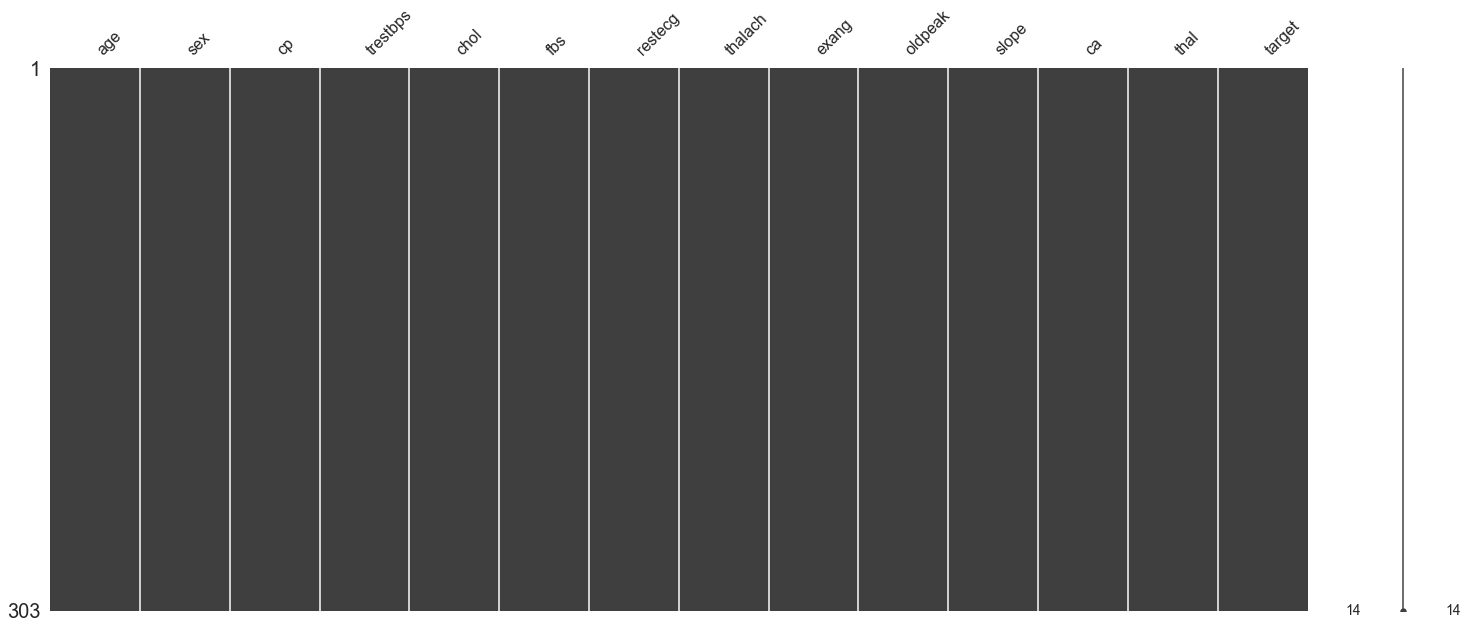

In [8]:
mano.matrix(df)

<AxesSubplot:>

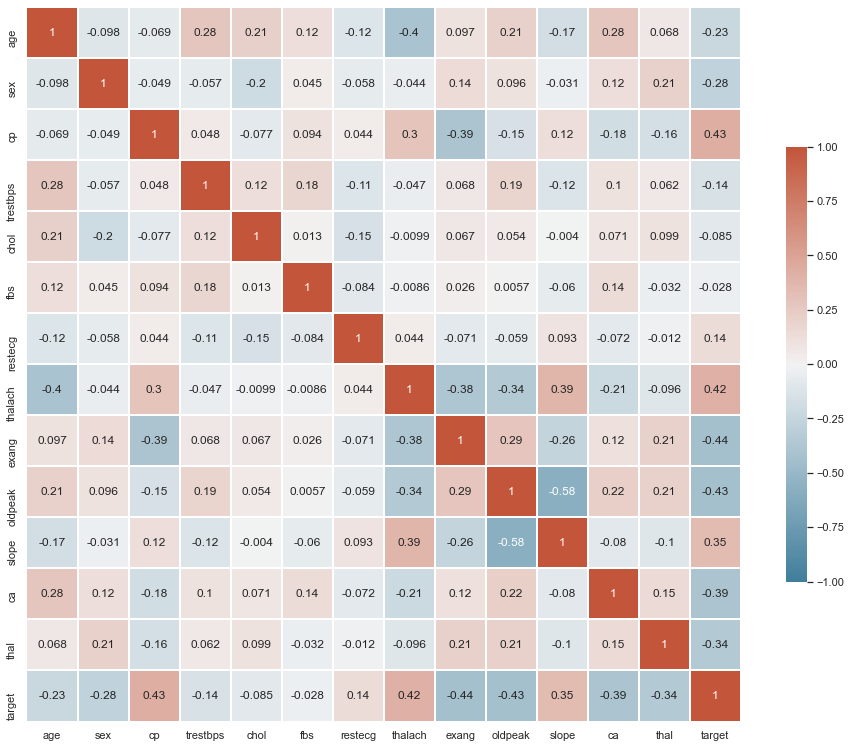

In [9]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [10]:
a=df.corr()["target"]
a.round(4).abs().sort_values(ascending=False)

target      1.0000
exang       0.4368
cp          0.4338
oldpeak     0.4307
thalach     0.4217
ca          0.3917
slope       0.3459
thal        0.3440
sex         0.2809
age         0.2254
trestbps    0.1449
restecg     0.1372
chol        0.0852
fbs         0.0280
Name: target, dtype: float64

In [11]:
X = df.drop("target",axis=1) # 0 absense of heart disease 1 has heart disease 
Y = df["target"]

In [12]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.3, random_state=42,stratify=Y)

In [15]:
trainY.value_counts(normalize=True )

1    0.542453
0    0.457547
Name: target, dtype: float64

In [16]:
testY.value_counts(normalize=True )

1    0.549451
0    0.450549
Name: target, dtype: float64

In [17]:
model = LogisticRegression(max_iter=300) # max_iter to avoid the warning error

In [18]:
model.fit(trainX,trainY)

LogisticRegression(max_iter=300)

In [19]:
predictR= model.predict(testX)
predictRT = model.predict(trainX)

In [20]:
print(predictR)

[1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0]


In [21]:
print(testY)

123    1
283    0
206    0
95     1
271    0
      ..
104    1
2      1
142    1
257    0
239    0
Name: target, Length: 91, dtype: int64


### Train

In [22]:
b = accuracy_score(trainY,predictRT) # to check the Model Fit,Training Acu thats why model stcuked in accuracy-Underfitting
print(" Train accuracy score =", b.round(2))   

 Train accuracy score = 0.87


In [23]:
print(confusion_matrix(trainY,predictRT))

[[ 79  18]
 [  9 106]]


In [24]:
print(classification_report(trainY,predictRT)) # train

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        97
           1       0.85      0.92      0.89       115

    accuracy                           0.87       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



In [25]:
print(classification_report(testY,predictR)) #test

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [26]:
a= 0.87 - 0.75
print(a*100)

12.0


### train accuracy 12% higher than test accuracy and both are above 70%   allowing us to conclude that the model is overfit.  

## Test

In [27]:
a=accuracy_score(testY,predictR)
print(" Test accuracy score =" ,a.round(2))

 Test accuracy score = 0.75


In [28]:
print(confusion_matrix(testY,predictR))

[[28 13]
 [10 40]]


In [29]:
TN,FP,FN,TP = confusion_matrix(testY, predictR).ravel()

In [30]:
print("TP=",TP)
print("FN=",FN)
print("FP=",FP)
print("TN=",TN)

TP= 40
FN= 10
FP= 13
TN= 28


In [31]:
print(classification_report(testY,predictR))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [32]:
#Accuracy =(TP+TW/TP+TN+FP+FN)
Acc=(TP+TN)/(TP+TN+FP+FN)
print("acc=", Acc.round(2))

acc= 0.75


In [33]:
#Sensitivity =(TP/TP+FN)( recall)
Sc=(TP)/(TP+FN)
print("Sc=", Sc.round(2))

Sc= 0.8


In [34]:
#Specificity =(TN/TN+FP)
Sp=(TN)/(TN+FP)
print("Sp=", Sp.round(2))

Sp= 0.68


In [35]:
#Precision =(TP/TP+FP)
P=(TP)/(TP+FP)
print("P=", P.round(2))

P= 0.75


In [36]:
#F1 =((2xrecall/Sc x P) /recall/Sc x P)
F1=(2*P*Sc)/(P+Sc)
print("F1=", F1.round(2))

F1= 0.78


## Logistic Regression for predicting  (1/ patient has heart disease  )
  
### Accuracy    =  0.75   ~ 75%
### Sensitivity  =  0.80 
### Specificity  =  0.68 
### Precision    =  0.75
### F1                =  0.78 

## Logistic Regression by confusion matrix  (1/ patient has heart disease  )

### Accuracy    =  0.75      ~ 75%
### Sensitivity  =  0.80
### Specificity  =  0.68
### Precision    =  0.75
### F1                =  0.78

In [38]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn import tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
df.shape

(303, 14)

In [41]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [42]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [43]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [44]:
# configure the model
Dtc= tree.DecisionTreeClassifier(random_state=42)

In [45]:
Dtc.fit(trainX, trainY)

DecisionTreeClassifier(random_state=42)

In [46]:
print("training score =",Dtc.score(trainX,trainY))
print("test score =",Dtc.score(testX,testY).round(3))
print ("difference between train and test score = ", (Dtc.score(trainX,trainY)-Dtc.score(testX,testY)).round(3))

training score = 1.0
test score = 0.725
difference between train and test score =  0.275


In [47]:
train_predict=Dtc.predict(trainX)
test_predict=Dtc.predict(testX)

In [48]:
Dtc_train_acc =accuracy_score(trainY,train_predict)
Dtc_train_acc

1.0

In [49]:
trainY.shape

(212,)

In [50]:
train_predict.shape

(212,)

In [51]:
testY.shape

(91,)

In [52]:
trainX.shape

(212, 13)

In [53]:
Dtc_test_acc=accuracy_score(testY,test_predict)
Dtc_test_acc.round(4)

0.7253

In [54]:
y_pred = Dtc.predict_proba(testX)[:,1]

In [55]:
new_y =[]
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [56]:
accuracy_score(testY,new_y).round(4)

0.7253

## Optimizing  max depth

In [57]:
train_acc = []
test_acc  = []
for depth in range (1,20):
    Dtc= DecisionTreeClassifier(criterion='entropy',max_depth=depth, random_state=42)
    Dtc.fit(trainX, trainY)
    train_acc.append(Dtc.score(trainX, trainY))
    test_acc.append(Dtc.score(testX, testY))

In [58]:
data=pd.DataFrame({"max_depth": range (1,20),"train_acc": train_acc,"test_acc":test_acc })
data.head(5)

max_depth  train_acc  test_acc
0          1   0.783019  0.703297
1          2   0.801887  0.692308
2          3   0.858491  0.769231
3          4   0.896226  0.780220
4          5   0.924528  0.736264

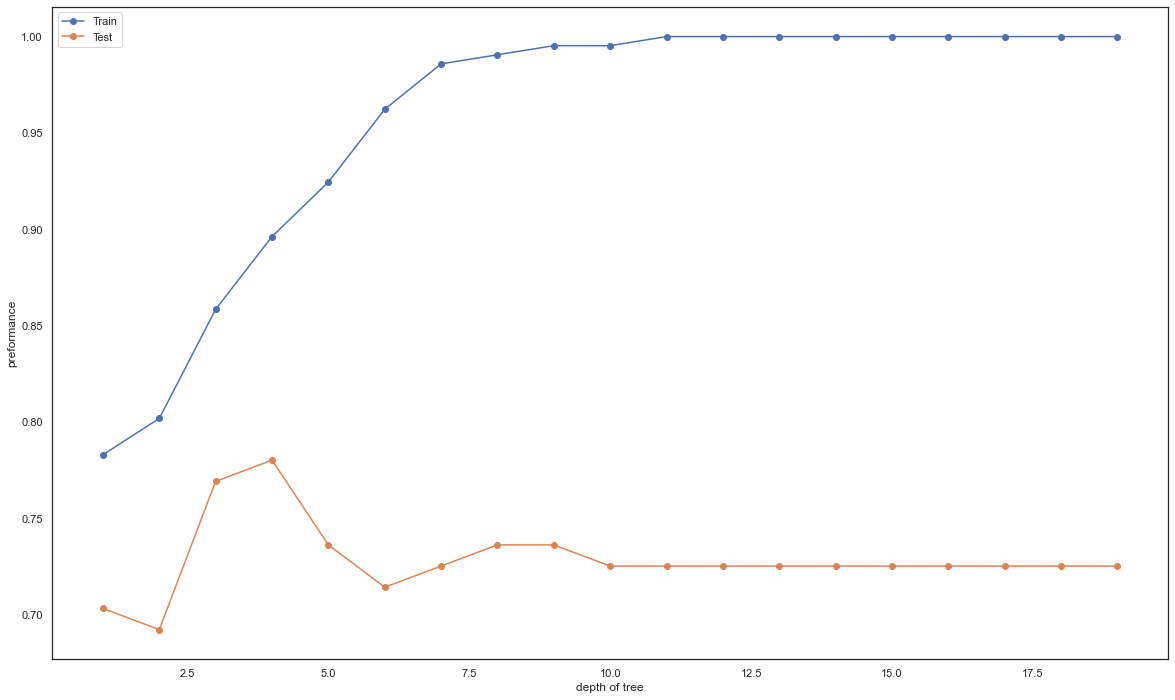

In [59]:
# plot of train and test scores vs tree depth
plt.figure(figsize=(20,12))
plt.plot(data["max_depth"], data["train_acc"], marker='o',label='Train',)
plt.plot(data["max_depth"], data["test_acc"], marker='o',label='Test', )
plt.xlabel("depth of tree")
plt.ylabel("preformance")
plt.legend()


## Optimizing  the tree using  Grid Search 

In [ ]:
 'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]

In [110]:
param_dict={
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,25),
    "min_samples_split":range(1,12),
    "min_samples_leaf" :range(1,5),
    'n_estimators': [100, 200, 300, 1000],
    'bootstrap': [True]
}

In [61]:
GS = GridSearchCV(Dtc,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
GS.fit(trainX, trainY)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=19,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [62]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [63]:
print('Best Criterion:', GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', GS.best_estimator_.get_params()['max_depth'])
print('min_samples_leaf:', GS.best_estimator_.get_params()['min_samples_leaf'])
print('min_samples_split:', GS.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 3
min_samples_leaf: 1
min_samples_split: 2


In [64]:
# configure the model(optimized)
Dtc_op= DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=1,min_samples_split=2, random_state=42)
Dtc_op.fit(trainX, trainY)
print("training score =",Dtc_op.score(trainX,trainY)*100)
print("test score =",Dtc_op.score(testX,testY).round(3)*100)
print ("difference between train and test score = ", (Dtc_op.score(trainX,trainY)-Dtc_op.score(testX,testY)).round(3)*100)

training score = 86.79245283018868
test score = 74.7
difference between train and test score =  12.1


In [65]:
PRDT = Dtc_op.predict(testX)
PRDTTrain = Dtc_op.predict(trainX)

In [66]:
print(accuracy_score(testY, PRDT)) # test accuracy for Decision Tree

0.7472527472527473


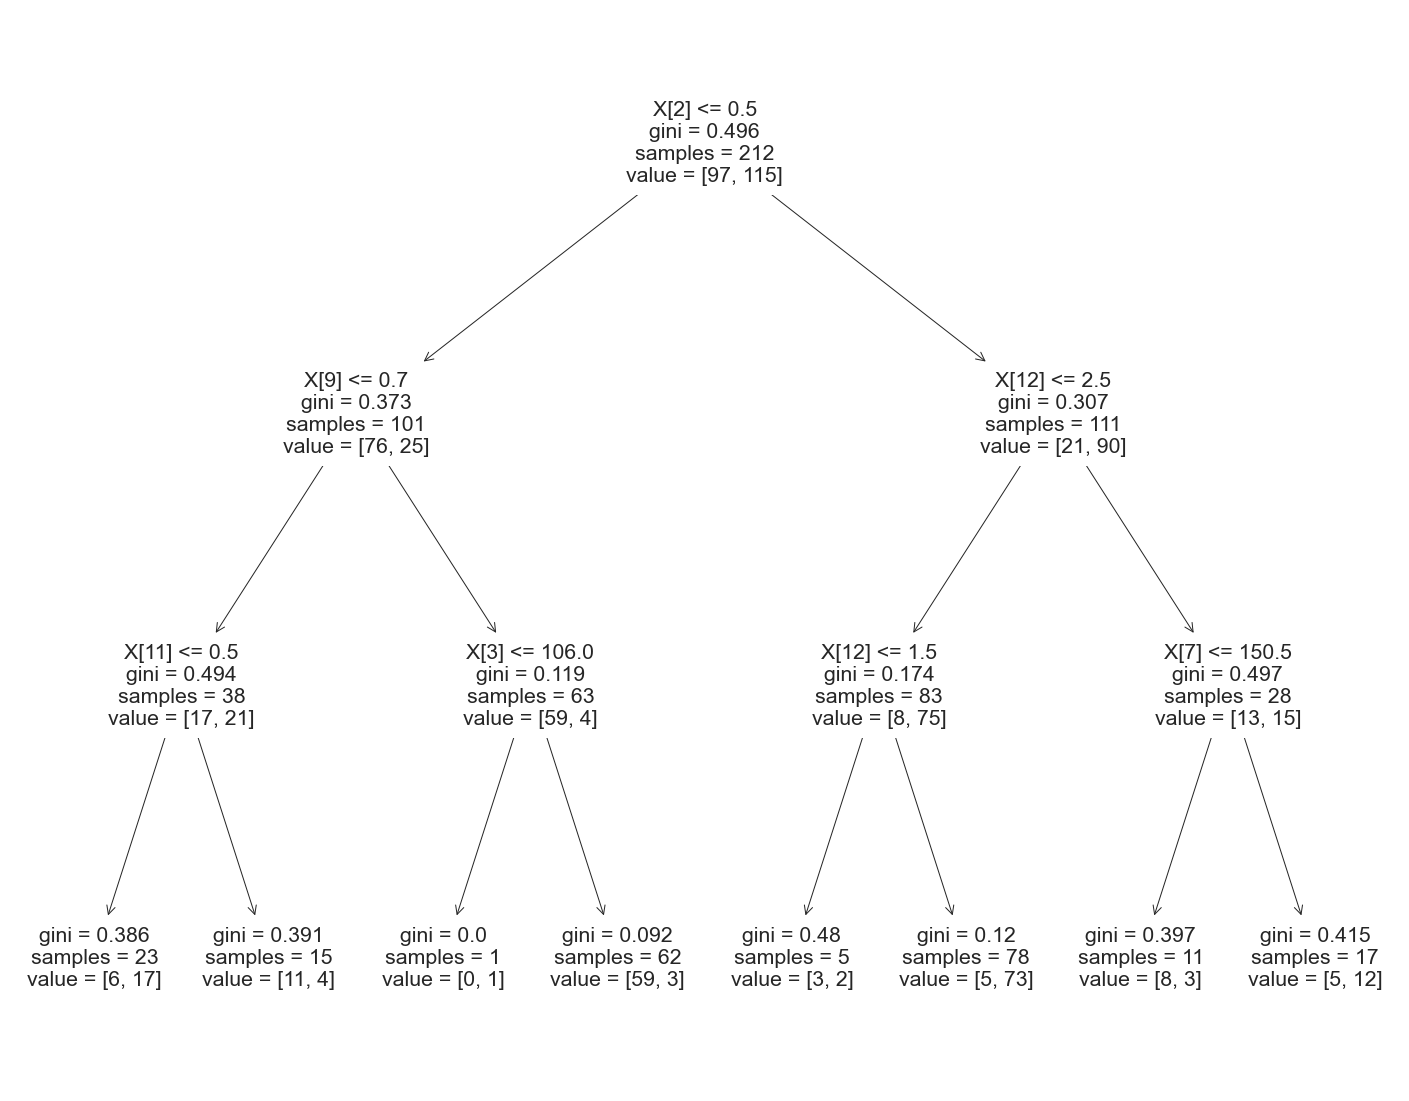

In [123]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtc_op,filled=False)               

In [76]:
print(classification_report(PRDTTrain, trainY)) # train Decision Tree 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        93
           1       0.90      0.87      0.88       119

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



In [77]:
print(classification_report(PRDT, testY)) # test  Decision Tree

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91



In [86]:
print(confusion_matrix(PRDT, testY))

[[28 10]
 [13 40]]


In [71]:
TN, FP, FN, TP = (confusion_matrix(PRDT, testY).ravel())

In [72]:
print("TP=",TP)
print("FN=",FN)
print("FP=",FP)
print("TN=",TN)

TP= 40
FN= 13
FP= 10
TN= 28


In [32]:
#Accuracy =(TP+TW/TP+TN+FP+FN)
Acc=(TP+TN)/(TP+TN+FP+FN)
print("acc=", Acc.round(2))

acc= 0.75


In [82]:
#Sensitivity =(TP/TP+FN)( recall)
Sc=(TP)/(TP+FN)
print("Sc=", Sc.round(2))

Sc= 0.75


In [83]:
#Specificity =(TN/TN+FP)
Sp=(TN)/(TN+FP)
print("Sp=", Sp.round(2))

Sp= 0.74


In [84]:
#Precision =(TP/TP+FP)
P=(TP)/(TP+FP)
print("P=", P.round(2))

P= 0.8


In [85]:
#F1 =((2xrecall/Sc x P) /recall/Sc x P)
F1=(2*P*Sc)/(P+Sc)
print("F1=", F1.round(2))

F1= 0.78


## Decision Tree for predicting  (1/ patient has heart disease  )
  
### Accuracy    =  0.75   ~ 75%
### Sensitivity  =  0.75
### Specificity  =  0.74
### Precision    =  0.80
### F1                =  0.78 

## Decision Tree  by confusion matrix  (1/ patient has heart disease  )

### Accuracy    =  0.75      ~ 75%
### Sensitivity  =  0.75
### Specificity  =  0.74
### Precision    =  0.80
### F1                =  0.78

# Random Forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RF = RandomForestClassifier(n_estimators=200,random_state=42)
RF.fit(trainX,trainY)
RF_pred = RF.predict(testX)
print(classification_report(RF_pred, testY))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        36
           1       0.88      0.80      0.84        55

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



In [102]:
print("training score =",RF.score(trainX,trainY)*100)
print("test score =",RF.score(testX,testY).round(3)*100)
print ("difference between train and test score = ", (RF.score(trainX,trainY)-RF.score(testX,testY)).round(3)*100)

training score = 100.0
test score = 81.3
difference between train and test score =  18.7


# Gridsearch  Optimization 

In [111]:
GSRF = GridSearchCV(RF,param_grid=param_dict,cv=5,verbose=1,n_jobs=-1)
GSRF.fit(trainX, trainY)

Fitting 5 folds for each of 8448 candidates, totalling 42240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 12),
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=1)

In [118]:
GSRF.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 200}

In [124]:
RFOP = RandomForestClassifier(bootstrap=True, n_estimators=200,random_state=42,criterion='gini',min_samples_split= 11,min_samples_leaf=2,max_depth= 5)
RFOP.fit(trainX,trainY)
RFOP_pred = RF.predict(testX)
print(classification_report(RFOP_pred, testY))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        36
           1       0.88      0.80      0.84        55

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



In [120]:
print("training score =",RFOP.score(trainX,trainY)*100)
print("test score =",RFOP.score(testX,testY).round(3)*100)
print ("difference between train and test score = ", (RFOP.score(trainX,trainY)-RFOP.score(testX,testY)).round(3)*100)

training score = 91.98113207547169
test score = 81.3
difference between train and test score =  10.7


In [158]:
print(accuracy_score(testY, RFOP_pred)) # test accuracy for RANDOM FOREST

0.8131868131868132


In [127]:
len(RFOP.estimators_)

200

In [130]:
RFOP.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=11, random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        

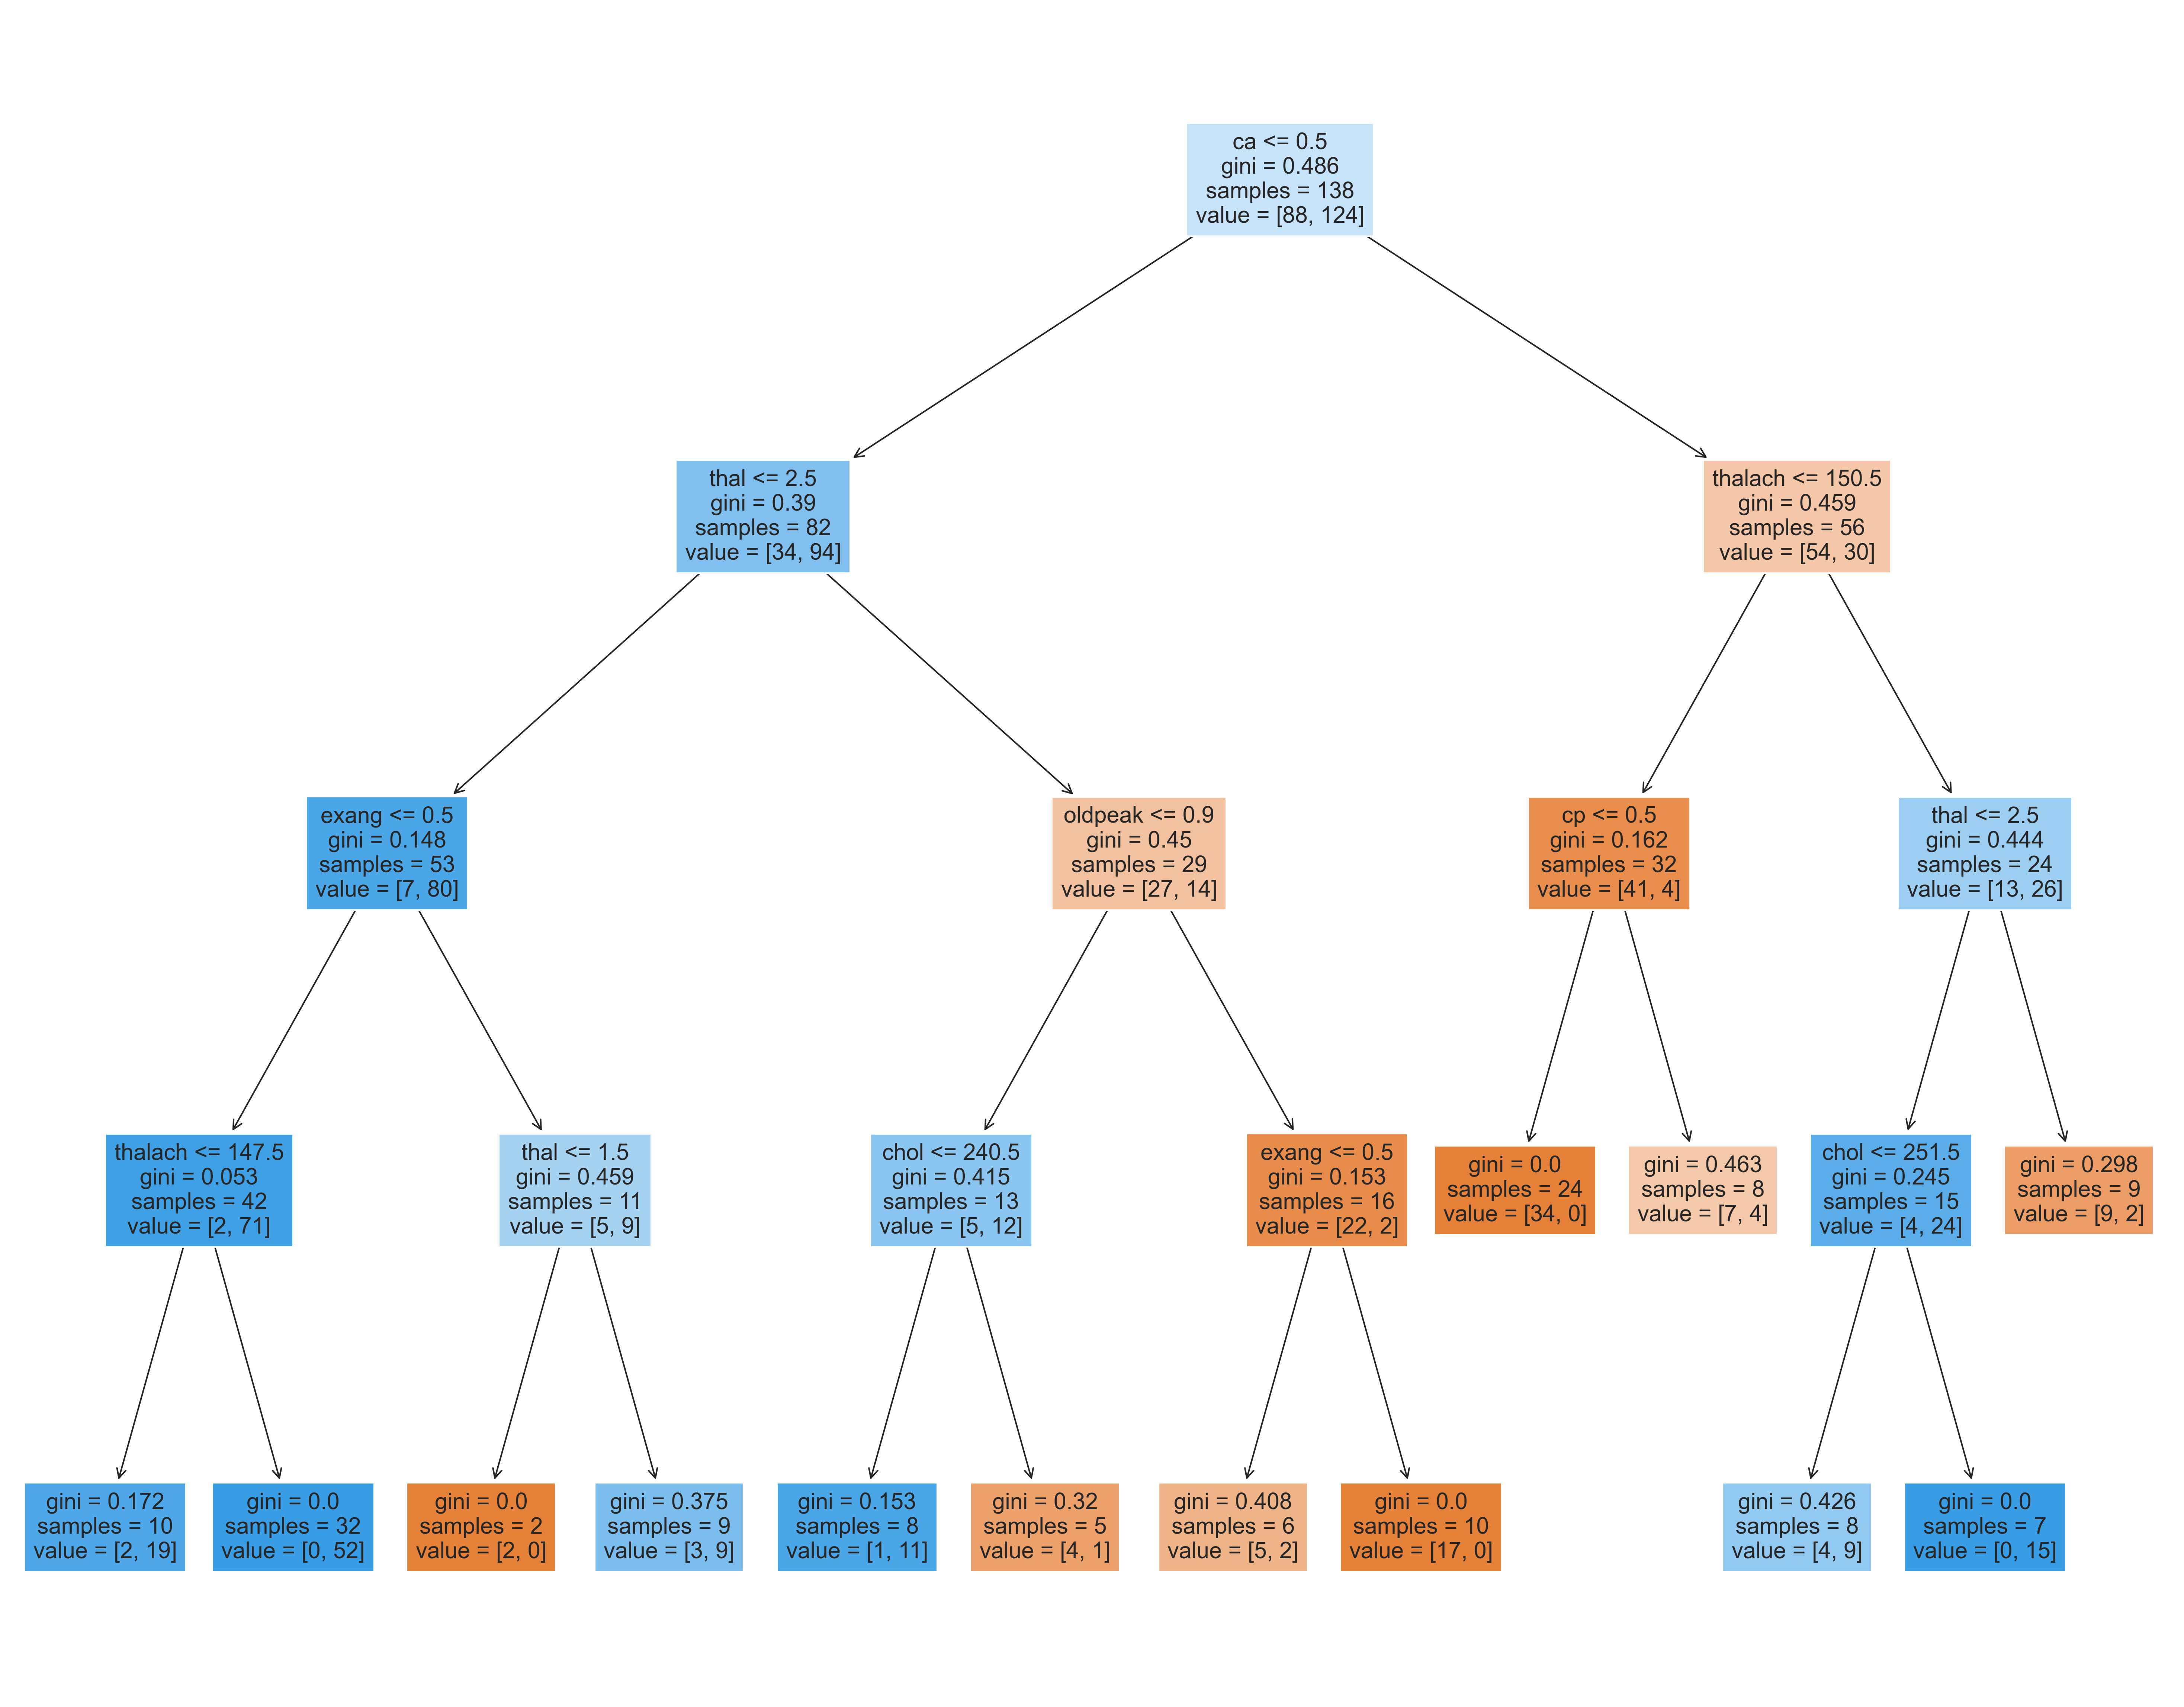

In [157]:
fig = plt.figure(figsize=(25,20),dpi=300)
_=tree.plot_tree(RFOP.estimators_[0],
                   feature_names =X.columns, 
                    filled = True)
                 

In [141]:
RFOP.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                       min_samples_split=11, random_state=1608637542)

In [147]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (20,10), dpi=900)
for index in range(0, 4):
    tree.plot_tree(RFOP.estimators_[index],
                   feature_names =X.columns, 
                    filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')